In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
titanic_data = pd.read_csv('train.csv')

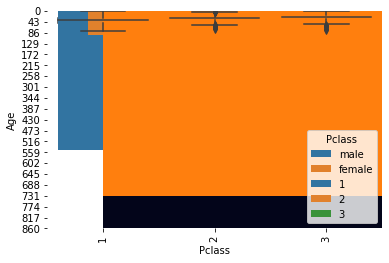

In [3]:
sns.heatmap(titanic_data.isnull(), cbar=False)

sns.countplot(x='Survived', data=titanic_data)

sns.countplot(x='Survived', hue='Sex', data=titanic_data)

sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

plt.hist(titanic_data['Age'].dropna())

plt.hist(titanic_data['Fare'])

sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

In [4]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

In [5]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

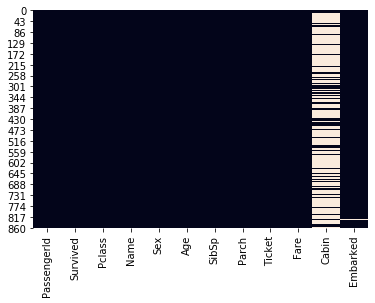

In [6]:
sns.heatmap(titanic_data.isnull(), cbar=False)
#This shows what data is null within the data set as you can see the cabin data has a lot of nulls so I will clean this in the next cells.


In [7]:
titanic_data.drop('Cabin', axis=1, inplace = True)

titanic_data.dropna(inplace = True)

In [8]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [9]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [10]:
titanic_data.head()
#Showing cleaned data set

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [11]:
#Spliting and preping data for the Machin learning
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

In [12]:
from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [14]:
model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [15]:
#Getting predictions about the modle its self
from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.83      0.65      0.73       110

    accuracy                           0.80       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[142  15]
 [ 38  72]]
